In [8]:
# append parent directory to path, so that we can import modules from histpat_toolkit
%load_ext autoreload
%autoreload 2

import sys
from io import BytesIO

import numpy as np
import requests
from PIL import Image

sys.path.append("../")
from histpat_toolkit.dzi_file import DZIFile
from histpat_toolkit.image_pyramid import DZIPyramid
from histpat_toolkit.tissue_detection.adaptive_gaussian_tissue_detector import AdaptiveGaussianDetector
from histpat_toolkit.tissue_detection.adaptive_mean_tissue_detector import AdaptiveMeanDetector
from histpat_toolkit.tissue_detection.otsu_blur_tissue_detector import OtsuBlurDetector
from histpat_toolkit.tissue_detection.otsu_tissue_detector import OtsuDetector
from histpat_toolkit.tissue_detection.threshold_tissue_detector import ThresholdDetector

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


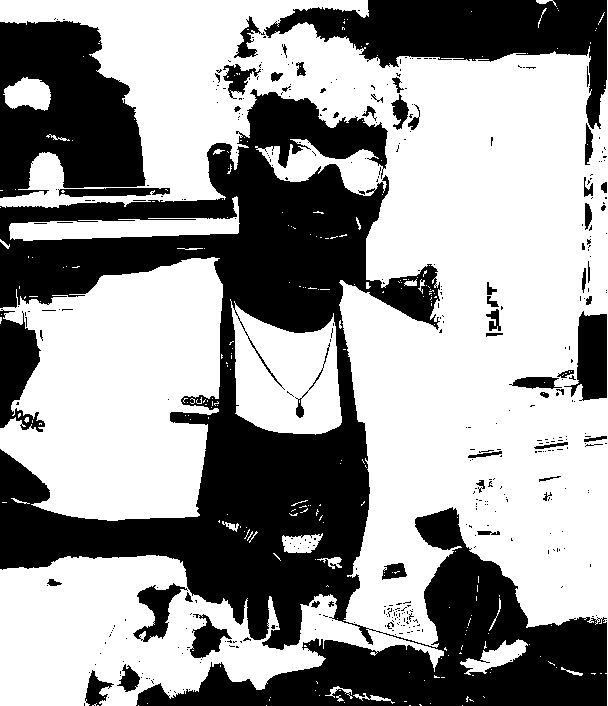

In [9]:
response = requests.get("http://0.0.0.0:8000/Ja_i_cebula.png")
ceb_img = Image.open(BytesIO(response.content))

detector = ThresholdDetector(100)
mask = detector.detect_tissue(np.array(ceb_img))

display(Image.fromarray(mask))

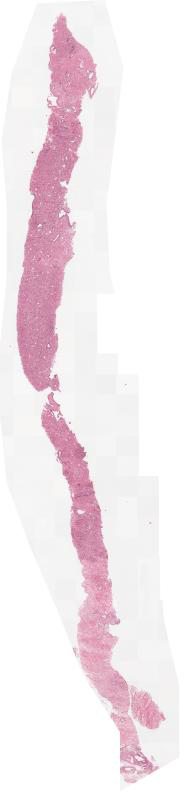

In [10]:
piramid = DZIPyramid(
    DZIFile("https://cancercenter-data.s3.sbg.io.cloud.ovh.net/b04344d8-efeb-4638-9458-870b4af4cf9f/0.dzi")
)

img = piramid.full_image(scale=0.0625 / 2)

display(Image.fromarray(img))

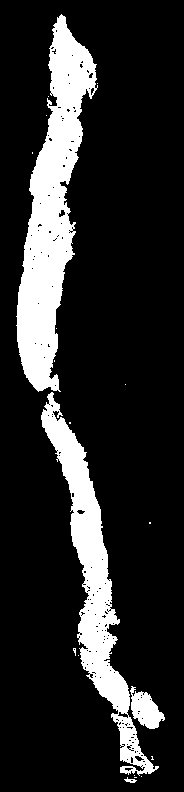

In [11]:
threshold = img.mean(axis=-1).min() * 1.7
display(Image.fromarray(ThresholdDetector(threshold).detect_tissue(img)))

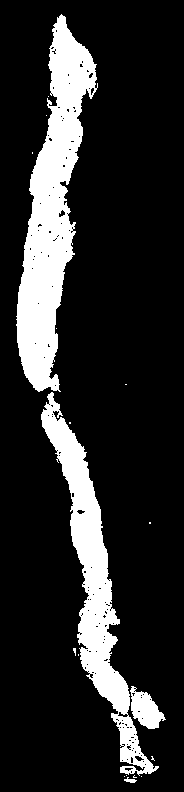

In [12]:
display(Image.fromarray(OtsuDetector().detect_tissue(img)))

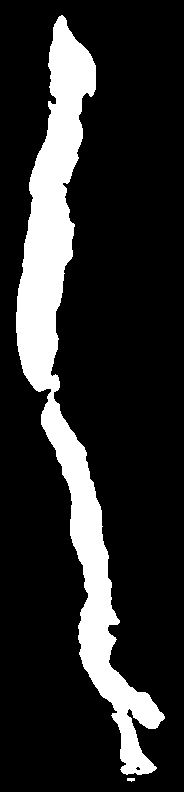

In [13]:
display(Image.fromarray(OtsuBlurDetector(5).detect_tissue(img)))

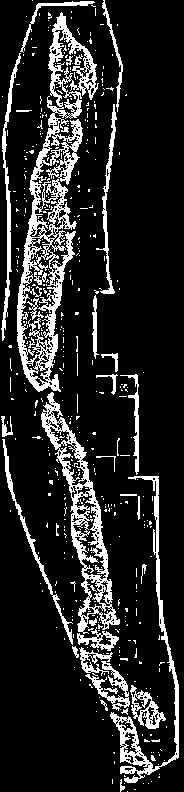

In [14]:
display(Image.fromarray(AdaptiveMeanDetector().detect_tissue(img)))

In [ ]:
display(Image.fromarray(AdaptiveGaussianDetector().detect_tissue(img)))